# Stackoverflow 2018 Survey #

![](https://i.stack.imgur.com/qHF2K.png)

**Outline for this analysis**
- Import the necessary libraries
- Setup Functions
- Get the data 
- Look at the data
- Variable Overview
- Pick the target variable
- Convert Data types (If necessary)
- Impute missing values (If necessary)
- Create dummy variables (If necessary)
- EDA
- Select model 
- Fit Model

### Importing the necessary libraries ###

In [719]:
#Since this ia a quick and dirty Kaggle notebook we will just use the basics
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import os
import seaborn as sns
%matplotlib inline
from sklearn.preprocessing import LabelEncoder


### Setup Functions ###
No need to understand this code, just some hacks I had previously stashed away to help expedite ML projects

In [739]:
def plot_histograms( df , variables , n_rows , n_cols ):
    fig = plt.figure( figsize = ( 16 , 12 ) )
    for i, var_name in enumerate( variables ):
        ax=fig.add_subplot( n_rows , n_cols , i+1 )
        df[ var_name ].hist( bins=10 , ax=ax )
        ax.set_title( 'Skew: ' + str( round( float( df[ var_name ].skew() ) , ) ) ) # + ' ' + var_name ) #var_name+" Distribution")
        ax.set_xticklabels( [] , visible=False )
        ax.set_yticklabels( [] , visible=False )
    fig.tight_layout()  # Improves appearance a bit.
    plt.show()

def plot_distribution( df , var , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , hue=target , aspect=4 , row = row , col = col )
    facet.map( sns.kdeplot , var , shade= True )
    facet.set( xlim=( 0 , df[ var ].max() ) )
    facet.add_legend()

def plot_categories( df , cat , target , **kwargs ):
    row = kwargs.get( 'row' , None )
    col = kwargs.get( 'col' , None )
    facet = sns.FacetGrid( df , row = row , col = col )
    facet.map( sns.barplot , cat , target )
    facet.add_legend()

def plot_correlation_map( df ):
    corr = results.corr()
    _ , ax = plt.subplots( figsize =( 12 , 10 ) )
    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )
    _ = sns.heatmap(
        corr, 
        cmap = cmap,
        square=True, 
        cbar_kws={ 'shrink' : .9 }, 
        ax=ax, 
        annot = True, 
        annot_kws = { 'fontsize' : 12 }
    )

def describe_more( df ):
    var = [] ; l = [] ; t = []
    for x in df:
        var.append( x )
        l.append( len( pd.value_counts( df[ x ] ) ) )
        t.append( df[ x ].dtypes )
    levels = pd.DataFrame( { 'Variable' : var , 'Levels' : l , 'Datatype' : t } )
    levels.sort_values( by = 'Levels' , inplace = True )
    return levels

def plot_variable_importance( X , y ):
    tree = DecisionTreeClassifier( random_state = 99 )
    tree.fit( X , y )
    plot_model_var_imp( tree , X , y )
    
def plot_model_var_imp( model , X , y ):
    imp = pd.DataFrame( 
        model.feature_importances_  , 
        columns = [ 'Importance' ] , 
        index = X.columns 
    )
    imp = imp.sort_values( [ 'Importance' ] , ascending = True )
    imp[ : 10 ].plot( kind = 'barh' )
    print (model.score( X , y ))

### Get the Data ###

In [721]:
#Load the data
results = pd.read_csv("C:\\Users\\EISELJA\\Desktop\\survey_results_public.csv")
schema = pd.read_csv("C:\\Users\\EISELJA\\Desktop\\survey_results_schema.csv")

C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:2785: DtypeWarning: Columns (8,12,13,14,15,16,50,51,52,53,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


### Look at the Data ###

In [722]:
results.head()

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy


### Variable Overview ###

In [723]:
#The metadata or schema provides a brief description of all our variables with respect to questions asked on the survey
schema

,Column,QuestionText
0,Respondent,Randomized respondent ID number (not in order ...
1,Hobby,Do you code as a hobby?
2,OpenSource,Do you contribute to open source projects?
3,Country,In which country do you currently reside?
4,Student,"Are you currently enrolled in a formal, degree..."
5,Employment,Which of the following best describes your cur...
6,FormalEducation,Which of the following best describes the high...
7,UndergradMajor,You previously indicated that you went to a co...
8,CompanySize,Approximately how many people are employed by ...
9,DevType,Which of the following describe you? Please se...


### Pick the target variable ###
#### For this exercise I chose CareerSatisfaction ####

In [724]:
# I always like to move my tagret variable to the front column, just a personal preference
results.set_index('CareerSatisfaction').reset_index()

,CareerSatisfaction,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,Extremely satisfied,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy
1,Neither satisfied nor dissatisfied,3,Yes,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",...,Daily or almost every day,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
2,Moderately satisfied,4,Yes,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Slightly dissatisfied,5,No,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy
4,Moderately satisfied,7,Yes,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",...,3 - 4 times per week,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy
5,Slightly satisfied,8,Yes,No,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",10 to 19 employees,...,1 - 2 times per week,Male,Straight or heterosexual,"Secondary school (e.g. American high school, G...",White or of European descent,18 - 24 years old,No,NaN,The survey was an appropriate length,Somewhat easy
6,Moderately satisfied,9,Yes,Yes,United States,No,Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",...,I don't typically exercise,Male,Straight or heterosexual,"Master’s degree (MA, MS, M.Eng., MBA, etc.)",White or of European descent,18 - 24 years old,No,No,The survey was an appropriate length,Somewhat easy
7,Moderately satisfied,10,Yes,Yes,Nigeria,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",10 to 19 employees,...,1 - 2 times per week,Female,NaN,Primary/elementary school,Black or of African descent,25 - 34 years old,No,NaN,The survey was too long,Somewhat difficult
8,Moderately satisfied,11,Yes,Yes,United States,No,Employed full-time,Some college/university study without earning ...,Fine arts or performing arts (ex. graphic desi...,100 to 499 employees,...,I don't typically exercise,Male,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,Yes,No,The survey was an appropriate length,Very easy
9,NaN,16,No,Yes,India,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",500 to 999 employees,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Let's take a look at the DataTypes ###

In [725]:
results.dtypes

Respondent                       int64
Hobby                           object
OpenSource                      object
Country                         object
Student                         object
Employment                      object
FormalEducation                 object
UndergradMajor                  object
CompanySize                     object
DevType                         object
YearsCoding                     object
YearsCodingProf                 object
JobSatisfaction                 object
CareerSatisfaction              object
HopeFiveYears                   object
JobSearchStatus                 object
LastNewJob                      object
AssessJob1                     float64
AssessJob2                     float64
AssessJob3                     float64
AssessJob4                     float64
AssessJob5                     float64
AssessJob6                     float64
AssessJob7                     float64
AssessJob8                     float64
AssessJob9               

In [726]:
#Check for NaN values
results.isnull().sum()

Respondent                         0
Hobby                              0
OpenSource                         0
Country                          412
Student                         3954
Employment                      3534
FormalEducation                 4152
UndergradMajor                 19819
CompanySize                    27324
DevType                         6757
YearsCoding                     5020
YearsCodingProf                20952
JobSatisfaction                29579
CareerSatisfaction             22351
HopeFiveYears                  23137
JobSearchStatus                19367
LastNewJob                     19966
AssessJob1                     31870
AssessJob2                     31870
AssessJob3                     31870
AssessJob4                     31870
AssessJob5                     31870
AssessJob6                     31870
AssessJob7                     31870
AssessJob8                     31870
AssessJob9                     31870
AssessJob10                    31870
A

In [727]:
#Transform hobby catgeorical variable to dummy variables
hobby = results[['Hobby']]
hobby = pd.get_dummies(hobby, prefix = 'Hobby')
hobby.head()

,Hobby_No,Hobby_Yes
0,0,1
1,0,1
2,0,1
3,1,0
4,0,1


In [728]:
#Drop Hobby column
results = results.drop(columns = ['Hobby'])

In [729]:
#Concatinate new Hobby dummy variables columns
results = pd.concat([results, hobby], axis = 1)
print("The shape of our data is: \n {}".format(results.shape))
results.head()

The shape of our data is: 
 (98855, 130)


,Respondent,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,...,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy,Hobby_No,Hobby_Yes
0,1,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,...,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy,0,1
1,3,Yes,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,...,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy,0,1
2,4,Yes,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,24-26 years,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1
3,5,No,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,18-20 years,...,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy,1,0
4,7,No,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,6-8 years,...,Straight or heterosexual,Some college/university study without earning ...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy,0,1


In [730]:
#Do the same for OpenSource since it also does not have any missing values
open_source = results[['OpenSource']]
open_source = pd.get_dummies(open_source, prefix = 'OpenSource')
results = results.drop(columns = ['OpenSource'])
results = pd.concat([results, open_source], axis = 1)
print("The shape of our data is: \n {}".format(results.shape))
results.head()

The shape of our data is: 
 (98855, 131)


,Respondent,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,...,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy,Hobby_No,Hobby_Yes,OpenSource_No,OpenSource_Yes
0,1,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,3-5 years,3-5 years,...,Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy,0,1,1,0
1,3,United Kingdom,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","A natural science (ex. biology, chemistry, phy...","10,000 or more employees",Database administrator;DevOps specialist;Full-...,30 or more years,18-20 years,...,White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy,0,1,0,1
2,4,United States,No,Employed full-time,Associate degree,"Computer science, computer engineering, or sof...",20 to 99 employees,Engineering manager;Full-stack developer,24-26 years,6-8 years,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,1
3,5,United States,No,Employed full-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or sof...",100 to 499 employees,Full-stack developer,18-20 years,12-14 years,...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy,1,0,1,0
4,7,South Africa,"Yes, part-time",Employed full-time,Some college/university study without earning ...,"Computer science, computer engineering, or sof...","10,000 or more employees",Data or business analyst;Desktop or enterprise...,6-8 years,0-2 years,...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy,0,1,1,0


### Time for some EDA examples using various tools and techniques in Pandas, Matplotlib.pyplot and Seaborn ###

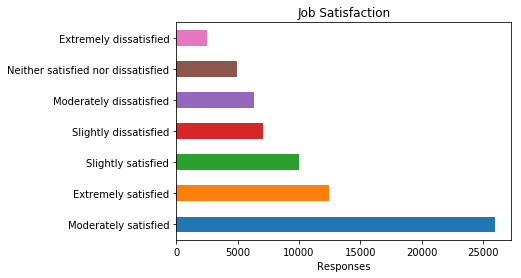

In [731]:
job_satisfaction = pd.Series(results.JobSatisfaction.value_counts())
plt.xlabel('Responses')
plt.title("Job Satisfaction")
job_satisfaction.plot(kind = 'barh')

### There is generally a high of satisfaction rating on Survey repsondents ###

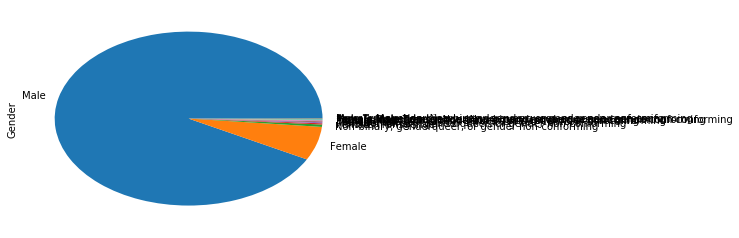

In [732]:
gender = pd.Series(results.Gender.value_counts())
gender.dropna()
gender.plot.pie()

### The overwhelming majority of survey repsondents were  Male ###

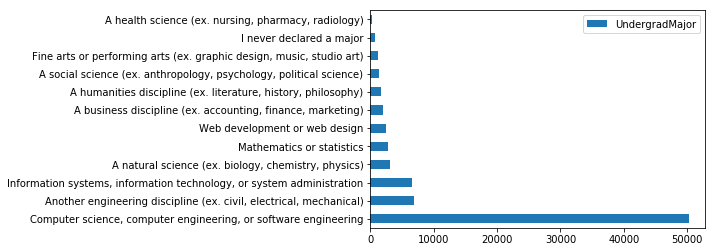

In [733]:
undergrad = pd.DataFrame(results.UndergradMajor.value_counts())
undergrad.dropna()
undergrad.plot(kind = 'barh')

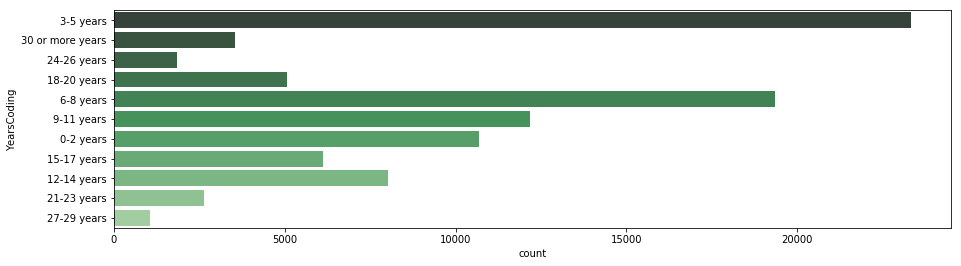

In [734]:
yearscoding = pd.Series(results['YearsCoding'])
f, ax = plt.subplots(figsize = (15,4))
sns.countplot(y = yearscoding, palette = 'Greens_d')

### Object Datatypes cannot be encoded so we will have to convert a few variables ###

In [735]:
#Lets convert a few other object datatypes in our DataFrame
results['Gender'] = results.Gender.astype(str)
results['Country'] = results.Country.astype(str)
results['Student'] = results.Student.astype(bool)
results['Employment'] = results.Employment.astype(str)
results['FormalEducation'] = results.FormalEducation.astype(str)
results['UndergradMajor'] = results.UndergradMajor.astype(str)
results['CompanySize'] = results.CompanySize.astype(str)
results['DevType'] = results.DevType.astype(str)
results['YearsCoding'] = results.YearsCoding.astype(str)
results['YearsCodingProf'] = results.YearsCodingProf.astype(str)
results['CareerSatisfaction'] = results.CareerSatisfaction.astype(str)

In [736]:
#Instantiate a Label Encoder Class
enc = LabelEncoder()

In [737]:
#Create a class to encode multiple columns in a DataFrame
class MultiColumnLabelEncoder:
    def __init__(self,columns = None):
        self.columns = columns # array of column names to encode

    def fit(self,X,y=None):
        return self # not relevant here

    def transform(self,X):
        '''
        Transforms columns of X specified in self.columns using
        LabelEncoder(). If no columns specified, transforms all
        columns in X.
        '''
        output = X.copy()
        if self.columns is not None:
            for col in self.columns:
                output[col] = LabelEncoder().fit_transform(output[col])
        else:
            for colname,col in output.iteritems():
                output[colname] = LabelEncoder().fit_transform(col)
        return output

    def fit_transform(self,X,y=None):
        return self.fit(X,y).transform(X)

In [738]:
MultiColumnLabelEncoder(columns = ['Gender', 'Country','Employment', 'FormalEducation', 'UndergradMajor', 'CompanySize', 'DevType']).fit_transform(results)

,Respondent,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,YearsCoding,YearsCodingProf,...,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy,Hobby_No,Hobby_Yes,OpenSource_No,OpenSource_Yes
0,1,85,True,1,1,10,4,9476,3-5 years,3-5 years,...,Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy,0,1,1,0
1,3,173,True,0,1,3,2,8278,30 or more years,18-20 years,...,White or of European descent,35 - 44 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy,0,1,0,1
2,4,175,True,0,0,6,4,9362,24-26 years,6-8 years,...,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0,1
3,5,175,True,0,1,6,3,9476,18-20 years,12-14 years,...,White or of European descent,35 - 44 years old,No,No,The survey was an appropriate length,Somewhat easy,1,0,1,0
4,7,150,True,0,8,6,2,7545,6-8 years,0-2 years,...,White or of European descent,18 - 24 years old,Yes,NaN,The survey was an appropriate length,Somewhat easy,0,1,1,0
5,8,173,True,0,1,6,1,4888,6-8 years,3-5 years,...,White or of European descent,18 - 24 years old,No,NaN,The survey was an appropriate length,Somewhat easy,0,1,1,0
6,9,175,True,0,8,6,2,6528,9-11 years,0-2 years,...,White or of European descent,18 - 24 years old,No,No,The survey was an appropriate length,Somewhat easy,0,1,0,1
7,10,120,True,0,1,6,1,8737,0-2 years,3-5 years,...,Black or of African descent,25 - 34 years old,No,NaN,The survey was too long,Somewhat difficult,0,1,0,1
8,11,175,True,0,8,7,3,295,30 or more years,21-23 years,...,White or of European descent,35 - 44 years old,Yes,No,The survey was an appropriate length,Very easy,0,1,0,1
9,16,74,True,0,1,6,6,8391,0-2 years,nan,...,NaN,NaN,NaN,NaN,NaN,NaN,1,0,0,1
